## Group Members and Contributions

- __Kenta Asai (A13784889)__
    - Data Analysis
    - Visualizations
- __Riley Froehlich (A13795579)__
    - Data Cleaning/Wrangling
- __Aniket Ghatnekar (A14688625)__
    - Data Analysis
    - Visualizations
- __Stephanie Shon (A13811108)__
    - Data Cleaning/Wrangling
    - Data Analysis
- __Haimei Yang (A13519498)__
    - Data Analysis
- __Jeffrey Yao (A14354925)__
    - Data Analysis

## Introduction

 __DATA SCIENCE QUESTION(S) & HYPOTHESIS:__

- Proposed Question
    - How does the frequency of traffic collisions change based on street quality index, traffic volume, and parking meter locations in the city of San Diego?

- Hypothesis
    - We hypothesize that traffic collisions in San Diego will have a higher frequency on streets that have lower OCI’s (Overall Condition Index), higher traffic volume, and will depend on the number of parking meters,  in an area (and thereby, variance of available parking spaces).

We think this topic has ample scope to explore a very important civil and social safety issue. By analysing how traffic collisions vary based on a variety of factors in our own city of San Diego, we plan to find the best way to reduce collisions generally. Although this is a specific analysis in only one city, we hope that highly correlational variables can be recognized with global applicability, at least to some degree.

### Background

Safety is the number one priority when driving. Unfortunately, traffic collisions and rule breaking happen regularly and can range from minor incidents to severe injuries and even death. The number of traffic collisions in San Diego increase every year, and this could potentially affect UCSD students and faculty as many people use cars to commute to and from school. As students of UCSD, we want to find out if San Diego traffic collisions are affected by factors such as street quality, traffic density and the number of parking meters in an effort to gain a better understanding of which areas are most prone to collisions.

There has been a multitude of prior research that has studied the relationship between traffic collisions and different factors such as parking and driver behavior, in an attempt to improve road safety.

For starters, it is important to note that in Miller’s (2016) article, he recognizes that “while pedestrian-related collisions made up a very small share of priority corridor collisions, they comprised over two-thirds (67%) of the fatal collisions on those roadways.” Considering the statistics on the amount of accidents that include pedestrians, there is a big concern that the collisions on the road may affect those who aren’t in a vehicle. This increases the awareness of how deadly these collisions can be, and will continue to be, if there aren’t preventative measures taken for both the pedestrian and driver. In addition, there has been a study by NYU that determined a “71% correlation between risky driving behavior and traffic accidents and concluded that safer driving habits would help to prevent future traffic accidents” (Bousquet, 2017).  The percentage of parking-related midblock accidents increase as the size of streets decrease from a highway to a local street (Jack B. Humphreys & Donald J. Wheeler 1979). Highways do not have parking, but smaller local roads have parking spaces and meters by the sidewalk. 

Although these studies have found that these behaviors seem to play a big factor in road accidents, our team wants to research the cause of collisions from a different perspective. With the pressing issue of the increase in traffic collisions every year, we wanted to find more data on whether the OCI (Overall Condition Index), traffic volume, and the number of parking meters and/or spaces have played a role in the road accidents, in hopes that future preventative measures will be made.

__References:__
- (Humphreys & Wheeler, 1979) : http://onlinepubs.trb.org/Onlinepubs/trr/1979/722/722-004.pdf
- (Miller, 2016): https://datasmart.ash.harvard.edu/news/article/san-jose-tackles-traffic-with-data-802)
- (Bousquet, 2017): https://datasmart.ash.harvard.edu/news/article/can-better-data-make-zero-traffic-deaths-a-reality-1138)

## Data

The following are links to the datasets to be used in this project:

- Traffic Collisions dataset: https://data.sandiego.gov/datasets/police-collisions/
- Street quality datasets:https://data.sandiego.gov/datasets/streets-overall-condition-index/
- Parking meter dataset: https://data.sandiego.gov/datasets/parking-meters-locations/


The traffic collisions dataset includes all kinds of unlawful acts caught by the local police, such as taking illegal turns, stop requirements, and hit and runs. There are a total of 22,862 observations and with each observation, there is an indicated date, time, street number, street name, street type, violation type, and the number of people injured or killed.

The street quality datasets contains two sets of data measuring the quality of streets in San Diego based on an Overall Condition Index (OCI). One data set is from 2011 and contains 28,098 observations whereas the other data set is from 2015 and contains 30,712 observations. Each observation has an overall condition index, street name, segment length, segment width, the square footage of the segment, what type of street and pavement it is, and a description on whether it is good, fair or poor. 

The parking meter dataset contains the location of parking meters in San Diego. There are a total of 4668 observations and each observation has a zone, an area, a sub-area and the meter’s longitude and latitude.  

All the datasets cover records over the past couple years, hence giving a large enough combined dataset to work with. We plan to extract the features our project is concerned with, and combine them sensibly into one dataset for ease of analysis.

Cleaning the data will be required as many entries under some columns are not filled. Fortunately, since these are mostly names of streets we do not need them(we will use the street locations and codes instead). We might also find that features such as police beats considerably influence traffic collision frequency during exploratory analysis, and may decide to include features based on degree of correlation.


## Imports and Display Preparation

To start off, import all necessary libraries required for anaylsis. 

In [23]:
import numpy as np
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display_html
from scipy.stats.stats import pearsonr
from scipy import stats
import csv

Now we define a function that lets you see multiple dataframes together.

In [3]:
# method to display all df heads
def multiple_df_display(*arg):
    html_str=''
    for df in arg:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## Data Cleaning

For the cleaning process, we start by removing all columns in the four major dataframes, which will give no correlation, based on logic and common sense. These columns include numbering systems and id's which do not have any meaning inherently, for the purpose of our analyses. Otherwise, they are features which deviate from our question and hypothesis.

In [50]:
# read in datasets from csv files taken from -   https://data.sandiego.gov/datasets/
df_index = pd.read_csv("oci_2015_datasd.csv")
df_collisions = pd.read_csv("pd_collisions_datasd.csv")
df_meters = pd.read_csv("treas_parking_meters_loc_datasd.csv")

# drop OCI columns
df_index.drop( columns = ["seg_id", "seg_length_ft", "street_from", "street_to", "oci_wt", "pvm_class", "func_class"], inplace = True )

# drop collision columns
df_collisions.drop(columns = ["police_beat", "report_id", "cross_st_name", "cross_st_type", "street_dir", "cross_st_dir", "violation_section", "violation_type", "charge_desc", "injured", "killed", "hit_run_lvl"], inplace = True)
# combine street name and street type
df_collisions[ 'street' ] = df_collisions[ 'street_name' ].map( str ) + ' ' + df_collisions[ 'street_type' ]
df_collisions.drop( columns = ["street_name", "street_type"], inplace = True )
df_collisions.dropna( inplace = True )

# drop parking meter columns
df_meters.drop( columns = ["area", "pole", "config_id", "config_name"], inplace = True )
df_meters.dropna( inplace = True )

#rename columns with complex names
df_index.rename( columns = { 'seg_width_ft' : 'street width (ft)', 'area_sq_ft': 'area (sq ft)' }, inplace = True)
df_meters.rename( columns = { 'sub_area': 'area' }, inplace = True )

multiple_df_display(df_index[0:5], df_collisions[0:5], df_meters[0:5])

oci 
 street 
 street width (ft) 
 area (sq ft) 
 oci_desc 
 
 
 
 
 0 
 65.14 
 ALLEY 
 30.0 
 23181.774 
 Fair 
 
 
 1 
 67.45 
 ALLEY 
 30.0 
 5880.075 
 Fair 
 
 
 2 
 70.88 
 ALLEY 
 30.0 
 11850.147 
 Good 
 
 
 3 
 84.00 
 ALLEY 
 30.0 
 5760.075 
 Good 
 
 
 4 
 79.24 
 ALLEY 
 30.0 
 7552.620 
 Good 
 
 
 
 
 
 
 date_time 
 street_no 
 street 
 
 
 
 
 0 
 2017-01-01 00:01:00 
 8300 
 CAM DEL ORO 
 
 
 1 
 2017-01-01 00:01:00 
 6400 
 CRAWFORD STREET 
 
 
 2 
 2017-01-01 00:01:00 
 8100 
 ROYAL GORGE DRIVE 
 
 
 3 
 2017-01-01 00:01:00 
 5500 
 VALERIO TRAIL 
 
 
 4 
 2017-01-01 01:00:00 
 1000 
 11TH AVENUE 
 
 
 
 
 
 
 zone 
 area 
 longitude 
 latitude 
 
 
 
 
 0 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145178 
 32.700353 
 
 
 1 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145178 
 32.700352 
 
 
 2 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145349 
 32.700155 
 
 
 3 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145405 
 32.700107 
 
 
 4 
 City 
 1000 CESAR CHAVEZ WAY 
 -117.145539 
 32.699987

The second step is to create a standardization for all datasets and then combine street descriptor columns from the oci dataset and the collisions dataset for our first analysis.

In [49]:
# initializing dictionary of collisions and street names
num_collisions = {}

# converting street types to standard short forms used in maps
conversion = {"STREET" : "ST", "AVENUE": "AV", "CIRCLE": "CR", "WAY":" WY", "ROAD": "RD", 
              "COURT" : "CT", "DRIVE" : "DR", "LANE": "LN", "PLACE": "PL", }

# loop through collisions dataframe
for index, row in df_collisions.iterrows():
    # split the street type from name
    street_type = str(row['street']).split(' ')[-1]
    
    # convert the street-type to short-hand
    if conversion.get(street_type) != None:
        street_type = conversion[street_type]
    # re-attach the street type to the name
    street_name = ' '.join(str(row['street']).split(' ')[0:-1]) + " " + street_type
    # add new streets to dictionary and add to old ones
    if num_collisions.get(street_name) == None:
        num_collisions[street_name] = 0;
    num_collisions[street_name]+=1;

# creating new column in df_index
df_index['collisions'] = 0

# filling the collisions column
for index, row in df_index.iterrows():
    street = str(row['street'])
    if num_collisions.get(street) != None:
        df_index.loc[index, 'collisions'] = num_collisions[street]

# ignore empty collisions because df_index.size > num_collisions.size
df_index_collisions = df_index[df_index.collisions != 0]
# drop columns which contain data subject to change, such as street quality
df_index_collisions.drop(columns=['oci','oci_desc'], inplace=True)
df_index_collisions[0:5]

,street,street width (ft),area (sq ft),collisions
2053,44TH ST,20.0,11322.960,20
2055,01ST AV,30.0,7295.655,85
2056,01ST AV,40.0,14080.000,85
2057,01ST AV,40.0,14280.000,85
2058,01ST AV,42.0,30156.000,85


Since basic dimensions of streets do not change much in a time span of 3-4 years, we first analyze street width. 

## Descriptive Analysis

We will now take a look at a few variables and their central tendencies before conducting exploratory analysis on them and finding possible correlations

In [6]:
# Calculate basic stats of central tendency for street width
street_width_mean = df_index_collisions['street width (ft)'].mean()
street_width_median = df_index_collisions['street width (ft)'].median()
street_width_std = df_index_collisions['street width (ft)'].std()
q75, q25 = np.percentile(df_index_collisions['street width (ft)'], [75 ,25])
street_width_iqr = q75 - q25

print("Mean width of streets with at least one collision: " + format(street_width_mean, '.3f'))
print("Median width of streets with at least one collision: " + format(street_width_median, '.3f'))
print("Standard Deviation of widths of streets with at least one collision: " + format(street_width_std, '.3f'))
print("Width Inter-Quartile Range of streets with at least one collision: " + format(street_width_iqr, '.3f'))

Mean width of streets with at least one collision: 42.884
Median width of streets with at least one collision: 40.000
Standard Deviation of widths of streets with at least one collision: 13.513
Width Inter-Quartile Range of streets with at least one collision: 15.000


Although making a histogram for this data is difficult, because of the many values needed on the x-axis (streets), the pattern of the data can be visualized in another way. Since the mean of the street width is greater than the median street width, the dataset distribution will be slightly skewed right, possibly due to outliers. Since the difference between the mean is quite small, it is safe to infer that the distribution is relatively symmetrical.

Now, the collisions dataset is separated into 2 subsets for descriptive analysis - 2017 data & 2018 data (2019 not taken because complete year data is not available as of yet). For these 2 subsets we only care about counts, as that is all we will use for descriptive analysis. To visualize presence of outliers, we will use boxplots.

In [7]:
collisions_2017 = df_collisions[df_collisions['date_time'].str.contains("2017")].copy()
collisions_2018 = df_collisions[df_collisions['date_time'].str.contains("2018")].copy()
collisions_2017.drop(columns = 'street_no',inplace=True)
collisions_2018.drop(columns = 'street_no',inplace=True)
collisions_2017.rename(columns = {'date_time':'Collision Counts (2017)'}, inplace=True)
collisions_2018.rename(columns = {'date_time':'Collision Counts (2018)'}, inplace=True)

2017 subset shape:
(10238, 2)
2018 subset shape:
(9897, 2)


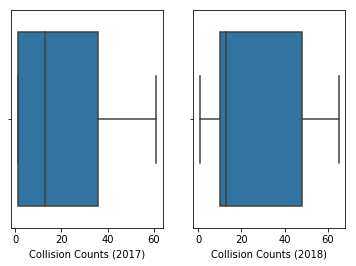

In [8]:
# get shape of two subsets
print("2017 subset shape:")
print(collisions_2017.shape)
print("2018 subset shape:")
print(collisions_2018.shape)

# group by streets
counts_2017 = collisions_2017.groupby(['street'], as_index = False).count()[0:9]
counts_2018 = collisions_2018.groupby(['street'], as_index = False).count()[0:9]

# Plot
fig, ax = plt.subplots(1,2)
sns.boxplot('Collision Counts (2017)', data = counts_2017, ax = ax[0])
sns.boxplot('Collision Counts (2018)', data = counts_2018, ax = ax[1])

The dataset sizes are roughly of the same order. As seen in the boxplots, the median collision frequency is 13.0, for both 2017 and 2018. Since no outliers are seen, the data's mean would be a better measure of central tendency.

In [9]:
# Since no outliers, find mean
print('Per street collision mean (2017):')
print(counts_2017['Collision Counts (2017)'].mean());
print('Per street collision mean (2018):')
print(counts_2018['Collision Counts (2018)'].mean())

Per street collision mean (2017):
19.11111111111111
Per street collision mean (2018):
27.444444444444443


OCI mean > OCI median, in both years. There is a significant difference, and it is safe to infer that the histograms would be considerably skewed to the right.

## Exploratory Analysis

We searched for correlation between street dimensions and collision frequency, covering all years in the collision dataset. The only correlation seen was with street width. Length did not seem to matter, and hence area did not give interesting results. To show correlation we create a scatter plot and draw a best-fit line to summarize the correlation.

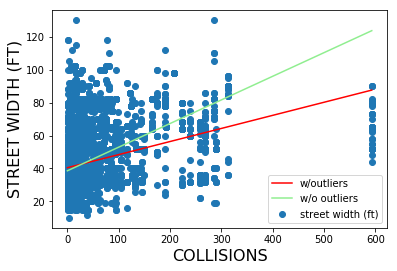

In [22]:
# best fit line over scatter plot
a, b = np.polyfit(df_index_collisions['collisions'], df_index_collisions['street width (ft)'], 1)
# start and end for line
in_oci = np.arange(0, max(df_index_collisions['collisions']) + 1)
# apply prediction formula for best fit
pred_oci = a * in_oci + b

# create scatter plot with x-axis as collisions over 3 years, and y-axis as the road segment width
plt.scatter(df_index_collisions['collisions'], df_index_collisions['street width (ft)'])
plt.xlabel('COLLISIONS', fontsize = 16)
plt.ylabel('STREET WIDTH (FT)', fontsize = 16)
plt.plot(in_oci, pred_oci, color = "red", label='w/outliers')

# copy of the dataframe from which we will remove outliers
df_index_collisions_no_outliers = df_index_collisions
# best fit line over scatter plot with outliers removed
df_index_collisions_no_outliers = df_index_collisions_no_outliers[(np.abs(stats.zscore(df_index_collisions_no_outliers['collisions'])) < 3)]
df_index_collisions_no_outliers = df_index_collisions_no_outliers[(np.abs(stats.zscore(df_index_collisions_no_outliers['street width (ft)'])) < 3)]
a, b = np.polyfit(df_index_collisions_no_outliers['collisions'], df_index_collisions_no_outliers['street width (ft)'], 1)
# start and end for line
in_oci = np.arange(0, max(df_index_collisions['collisions']) + 1)
# apply prediction formula for best fit
pred_oci = a * in_oci + b
plt.plot(in_oci, pred_oci, color = "lightgreen", label='w/o outliers')

plt.legend(loc='lower right')

As seen above there is a positive correlation. Note that the data spans from January 2017 to May 2019, and the collisions frequencies are mostly in hundreds because they are summations of instances, instead of single occurrences (we can use summation since street width remains relatively the same). Immediately, the outliers over the 600 frequency mark raise a question as to why they are so far apart from the rest of the data. We came up with the explanation to this by looking which street this related to, and we found it to be University Avenue, which is very long, consists of several segments, and starts less than a mile from San Diego State University. This provides a logical explanation to the abnormally high frequency, possibly due to reckless driving by students. That being said, because of the high number of datapoints, another visualization will be necessary, in which log of collisions will be used to negate the effect of spread of data in the above visualization. 

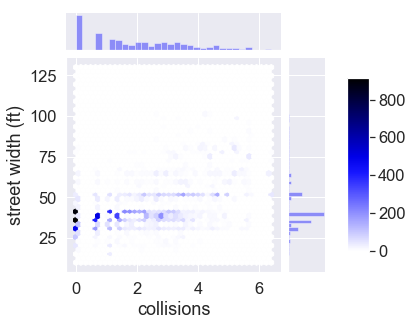

Pearson correlation coefficient r, p-value:
(0.40231195103438105, 0.0)

~Outliers Exluded~ Pearson correlation coefficient r, p-value:
(0.4408528486729633, 0.0)


In [45]:
df_index_collisions_copy = df_index_collisions.copy()

# take log of collisions column
df_index_collisions_copy['collisions'] = np.log(df_index_collisions_copy['collisions'])

# create hex plot for log data
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
hexplot = sns.jointplot(x="collisions", y="street width (ft)", data=df_index_collisions_copy, kind="hex",color = "blue")
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])
plt.colorbar(cax=cbar_ax)
plt.show()

# Find correlation coefficient and significance
print("Pearson correlation coefficient r, p-value:")
print(pearsonr(list(df_index_collisions['collisions']),list(df_index_collisions['street width (ft)'])))
print('\n'+ "~Outliers Exluded~ Pearson correlation coefficient r, p-value:")
print(pearsonr(list(df_index_collisions_no_outliers['collisions']),list(df_index_collisions_no_outliers['street width (ft)'])))

Clearly, lower street width correlates to higher number of collisions (log). The correlation coefficient suggest moderately strong positive correlation between the two, and the p-value suggests that it is highly significant and not due to chance (for both outliers included and excluded).

Now we will look for a potential relationship between number of parking meters and number of collisions. Before conducting analysis, our hypothesis was that the more the number of parking meters on the street, the less street width available for moving cars, and hence the street might have higher collision frequency. Note: Descriptives for parking meters not available since the data are geographical and do not have measures of central tendency.

In [46]:
# map streets to number of parking meters
num_meters = {}

# loop through each parking meter entry and add up based on street
for index, row in df_meters.iterrows():
    # remove the street #
    street_name = " ".join(str(row["area"]).split(" ")[1:])
    
    # add to dictionary
    if num_meters.get(street_name) == None:
        num_meters[street_name] = 0
    num_meters[street_name]+=1

In [48]:
# new datafram with collisions and parking meters for streets that have at least 1 collision
df_pmcollisions = pd.DataFrame()
df_pmcollisions["street_name"] = num_collisions.keys()
df_pmcollisions["collisions"] = num_collisions.values()
df_pmcollisions["parking_meters"] = 0

# loop through and add # of parking meters based on our dictionary
for index, rows in df_pmcollisions.iterrows():
    street_name = rows["street_name"]
    
    if num_meters.get(street_name) != None:
        df_pmcollisions.loc[index, "parking_meters"] = num_meters[street_name]

df_pmcollisions[0:5]

,street_name,collisions,parking_meters
0,CAM DEL ORO,10,0
1,CRAWFORD ST,3,0
2,ROYAL GORGE DR,1,0
3,VALERIO TRAIL,1,0
4,11TH AV,55,0


Text(0.5, 0, 'Number of Parking Meters')

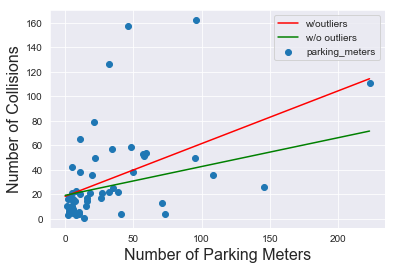

In [22]:
df_pmcollisions_small = df_pmcollisions[df_pmcollisions.parking_meters != 0]
plt.scatter(df_pmcollisions_small['collisions'], df_pmcollisions_small['parking_meters'])

# best fit line over scatter plot including outliers
a, b = np.polyfit(df_pmcollisions_small['collisions'], df_pmcollisions_small['parking_meters'], 1)
# start and end for line
in_oci = np.arange(0, max(df_pmcollisions_small['collisions']) + 1)
# apply prediction formula for best fit
pred_oci = a * in_oci + b
plt.plot(in_oci, pred_oci, color = "red", label='w/outliers')

# copy of the dataframe from which we will remove outliers
df_pmcollisions_small_no_outliers = df_pmcollisions_small
# best fit line over scatter plot with outliers removed
df_pmcollisions_small_no_outliers = df_pmcollisions_small_no_outliers[(np.abs(stats.zscore(df_pmcollisions_small_no_outliers['collisions'])) < 3)]
df_pmcollisions_small_no_outliers = df_pmcollisions_small_no_outliers[(np.abs(stats.zscore(df_pmcollisions_small_no_outliers['parking_meters'])) < 3)]
a, b = np.polyfit(df_pmcollisions_small_no_outliers['collisions'], df_pmcollisions_small_no_outliers['parking_meters'], 1)
# start and end for line
in_oci = np.arange(0, max(df_pmcollisions_small['collisions']) + 1)
# apply prediction formula for best fit
pred_oci = a * in_oci + b
plt.plot(in_oci, pred_oci, color = "green", label='w/o outliers')

plt.legend(loc='upper right')

plt.ylabel("Number of Collisions", fontsize = 16)
plt.xlabel("Number of Parking Meters", fontsize = 16)

# Geographical Heatmap Analysis

First we create new dataframes holding data since 2017 till date, and obtain latitudes and longitudes of collisions.

Adding latittude and longitude coordinates for map analysis
Sample Geocoding Code

```
    #get_geocode is a function that calls the openmapquest api for coordinates
    #If the request fails, None will be returned
        def get_geocode( address ):
            
            #format the api key and address into the url
            to_request = url.format( api_key, address )
            
            #request the geocode, converting what is returned to text
            ret_json = requests.get( to_request ).text
            
            #replace all instance of \\ with raw values for \\
            #because python automatically discards \\
            ret_json = ret_json.replace( '\\' , r'\\')
            
            #if the get statement was good, load the json
            if ret_json != 0:
                data = json.loads( ret_json )
                
                #if the json found a location for an address
                #return lat and long coordinates
                if data[ 'results' ] != None:
                    return data['results'][0]['locations'][0]['latLng']
                    
            #otherwise return none
            return None

    #loads the dataframe from the main program and updates the dataframe with
    #latitude and longitude coordinates

        df_tc = pd.read_csv( 'df_traffic_collisions.csv', index_col=0)
        df_tc['lat'] = ''
        df_tc['lng'] = ''

        for index, row in df_tc.iterrows():
            latLng = get_geocode(row['street_name'] + str( ', San Diego, CA' ))    
            if latLng != None:
                df_tc[ 'lat' ][index] = latLng['lat']
                df_tc[ 'lng' ][index] = latLng['lng']

    #save the updated dataframe for use in the main program
        df_tc.to_csv( 'df_geo.csv' )
```

In [3]:
#read data file and drop index column
df_geo = pd.read_csv( 'df_geo_data.csv' )
df_geo.drop( columns = 'Unnamed: 0', inplace = True )

#sort the data based on the date
df_geo.sort_values( 'date_time', inplace = True )

#based on a substring of the date_time column create a 
#boolean series that compares the last two digits of the year
mask_17 = df_geo.date_time.str[ 2:4 ] == '17' 
mask_18 = df_geo.date_time.str[ 2:4 ] == '18'
mask_19 = df_geo.date_time.str[ 2:4 ] == '19' 

#placing the boolean series back into the dataframe
#creates split dataframes based on the series
geo_17 = df_geo[ mask_17 ]
geo_18 = df_geo [ mask_18 ]
geo_19 = df_geo[ mask_19 ]

#print all dataframes
multiple_df_display( geo_17[0:4], geo_18[0:4], geo_19[0:4])

NameError: name 'pd' is not defined

Compare geographical heatmaps of the past 3 years' collision data

```

# Creating a central location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap_17 = folium.Map([32.875, -117.162498], zoom_start = 10)
gmap_18 = folium.Map([32.875, -117.162498], zoom_start = 10)
gmap_19 = folium.Map([32.875, -117.162498], zoom_start = 10)
    
# convert to (n, 2) nd-array format for heatmap
heatmap_arr_17 = geo_17[['lat', 'lng']].as_matrix()
heatmap_arr_18 = geo_18[['lat', 'lng']].as_matrix()
heatmap_arr_19 = geo_19[['lat', 'lng']].as_matrix()

# plot heatmap
gmap_17.add_child(plugins.HeatMap(heatmap_arr_17, radius=14))
gmap_18.add_child(plugins.HeatMap(heatmap_arr_18, radius=14))
gmap_19.add_child(plugins.HeatMap(heatmap_arr_19, radius=14))

```

Upper-Left: 2017

Upper-Right: 2018

Bottom: 2019; note: 2019 collision data not complete

<img src="geo_heatmap.png">

Looking at the two heatmaps with complete data available (2018 & 2019), a geographical pattern of collisions is seen. Streets around Downtown San Diego, the airport area, San Diego State University, and UCSD are identified with higher number of collisions.